# AI PROJECT      


# SHAPE DETECTION ON IMAGES AND GUI

# 1.Shape Detection On Image

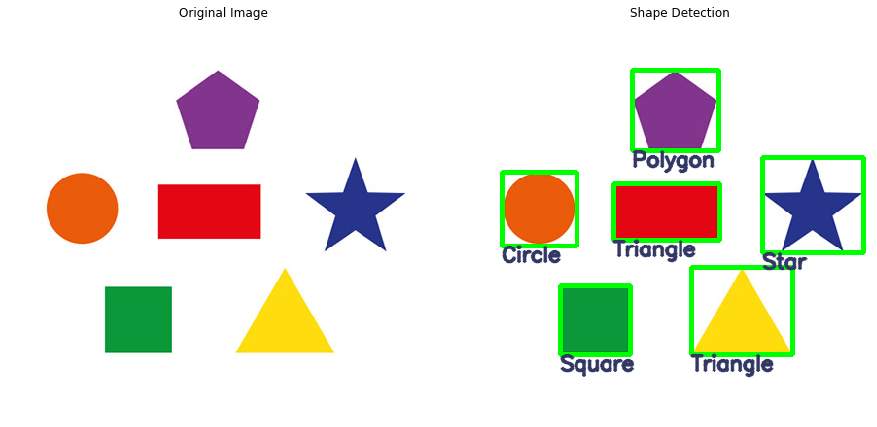

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#reading images
circle =    cv2.imread(r'media/circle.png',1)
square =    cv2.imread(r'media/square.png',1)
rectangle = cv2.imread(r'media/rectangle.jpeg',1)
triangle =  cv2.imread(r'media/triangle.jpg',1)
star =      cv2.imread(r'media/star.jpg',1)
polygon =   cv2.imread(r'media/polygon.jpg',1)
#saving all shapes in list
allshapes = [circle, square, rectangle  ,triangle ,star, polygon]
#saving shapes in same order
shapenames= ['Circle','Square', 'Rectangle', 'Triangle', 'Star', 'Polygon']
#creating the contour list for all shapes
allcontours=[]
#loop to find contour
for index,shape in enumerate(allshapes):
    #edge detection through canny edge detecction
    mask = cv2.Canny(shape,100,300)
    #dilate the mask so that no gaps in main contour
    mask = cv2.dilate(mask,None,iterations = 2)
    # detecting contours
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        #if state contour detected
        state = 'Detected'
        #getting maximum contour from image
        c = max(contours, key = cv2.contourArea)
        #append the contour in contour list
        allcontours.append(c)
    else:
        state = 'Not Detected'
test_image = cv2.imread('media/shapes.jpg')  

original = test_image.copy()

# extract the edge mask
mask = cv2.Canny(test_image,100,300)

# dilate the mask so there are no gaps in the main contour (comment this line to see the gaps)
mask = cv2.dilate(mask,None,iterations = 1)

# detect contours
contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


thresh = 0.3
for test_contour in contours:
    # get a bounding box around each contour and draw it.
    x,y,w,h = cv2.boundingRect(test_contour)
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),3)

    scores=[]

    # Now for each shape go over all saved contours and save the matchshape score
    for cnt in allcontours:
        score = cv2.matchShapes(test_contour,cnt,1,0.0)
        scores.append(score)

    # Grab the index of lowest scoring contour
    pos = np.argmin(np.array(scores))

    # Also grab the minimum score.
    finalscore = min(scores)

    # Make sure the lowest score is below some threshold so we can also label unkown shapes
    if finalscore < thresh:

        # set label of the detected shape using the index we got previously 
        label = shapenames[pos]

    else:
        label = 'Unknown Shape'


    cv2.putText(test_image, label, (x,y+h+16), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,55,50), 2, cv2.LINE_AA)

plt.figure(figsize=[15,15])
plt.subplot(1,2,1);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(1,2,2);plt.imshow(test_image[:,:,::-1]);plt.title("Shape Detection");plt.axis('off');

# 2.Shape Detection on Image of Your Choice

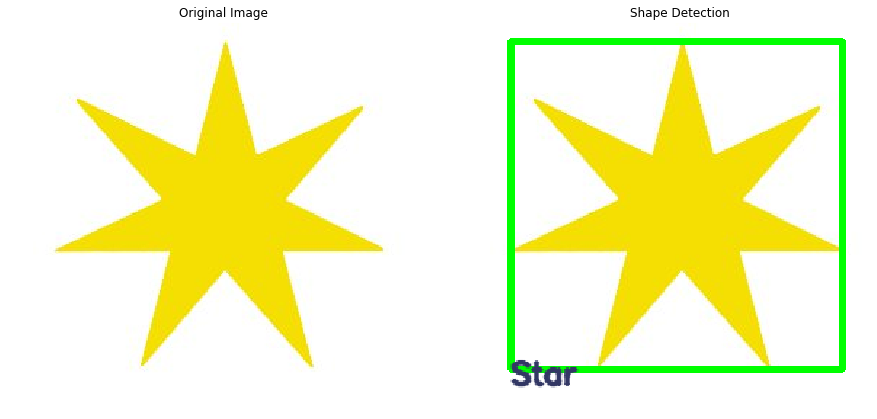

In [3]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import cv2
import matplotlib.pyplot as plt
import numpy as np
#reading images
circle =    cv2.imread(r'media/circle.png',1)
square =    cv2.imread(r'media/square.png',1)
rectangle = cv2.imread(r'media/rectangle.jpeg',1)
triangle =  cv2.imread(r'media/triangle.jpg',1)
star =      cv2.imread(r'media/star.jpg',1)
polygon =   cv2.imread(r'media/polygon.jpg',1)
#saving all shapes in list
allshapes = [circle, square, rectangle  ,triangle ,star, polygon]
#saving shapes in same order
shapenames= ['Circle','Square', 'Rectangle', 'Triangle', 'Star', 'Polygon']
#creating the contour list for all shapes
allcontours=[]
#loop to find contour
for index,shape in enumerate(allshapes):
    #edge detection through canny edge detecction
    mask = cv2.Canny(shape,100,300)
    #dilate the mask so that no gaps in main contour
    mask = cv2.dilate(mask,None,iterations = 2)
    # detecting contours
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        #if state contour detected
        state = 'Detected'
        #getting maximum contour from image
        c = max(contours, key = cv2.contourArea)
        #append the contour in contour list
        allcontours.append(c)
    else:
        state = 'Not Detected'
def shape_detector(test_image = None, display = True, thresh = 0.3):
      
        # if the user has not specified any image then open up a file selector so that he can select a file.
        if test_image is None:
            #Tk().withdraw() 
            filename = askopenfilename() 
            test_image = cv2.imread(filename)
            
        original = test_image.copy()
        
        # extract the edge mask
        mask = cv2.Canny(test_image,100,300)

        # dilate the mask so there are no gaps in the main contour (comment this line to see the gaps)
        mask = cv2.dilate(mask,None,iterations = 1)

        # detect contours
        contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            for test_contour in contours:

                # get a bounding box around each contour and draw it.
                x,y,w,h = cv2.boundingRect(test_contour)
                cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),3)

                scores=[]

                # Now for each shape go over all saved contours and save the matchshape score
                for cnt in allcontours:
                    score = cv2.matchShapes(test_contour,cnt,1,0.0)
                    scores.append(score)

                # Grab the index of lowest scoring contour
                pos = np.argmin(np.array(scores))

                # Also grab the minimum score.
                finalscore = min(scores)

                # Make sure the lowest score is below some threshold so we can also label unkown shapes
                if finalscore < thresh:

                    # set label of the detected shape using the index we got previously 
                    label = shapenames[pos]

                else:
                    label = 'Unknown Shape'


                cv2.putText(test_image, label, (x,y+h+10),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,55,50), 2, cv2.LINE_AA)
        else: 
            return None
        
        # if display is true then plot the image.
        if display:
            plt.figure(figsize=[15,15])
            plt.subplot(1,2,1);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
            plt.subplot(1,2,2);plt.imshow(test_image[:,:,::-1]);plt.title("Shape Detection");plt.axis('off');
            
        else:
            return test_image
shape_detector()

# 3.Shape Detection on GUI (press p to predict press c to clear gui & press q to quit)

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#reading images
circle =    cv2.imread(r'media/circle.png',1)
square =    cv2.imread(r'media/square.png',1)
rectangle = cv2.imread(r'media/rectangle.jpeg',1)
triangle =  cv2.imread(r'media/triangle.jpg',1)
star =      cv2.imread(r'media/star.jpg',1)
polygon =   cv2.imread(r'media/polygon.jpg',1)
#saving all shapes in list
allshapes = [circle, square, rectangle  ,triangle ,star, polygon]
#saving shapes in same order
shapenames= ['Circle','Square', 'Rectangle', 'Triangle', 'Star', 'Polygon']
#creating the contour list for all shapes
allcontours=[]
#loop to find contour
for index,shape in enumerate(allshapes):
    #edge detection through canny edge detecction
    mask = cv2.Canny(shape,100,300)
    #dilate the mask so that no gaps in main contour
    mask = cv2.dilate(mask,None,iterations = 2)
    # detecting contours
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        #if state contour detected
        state = 'Detected'
        #getting maximum contour from image
        c = max(contours, key = cv2.contourArea)
        #append the contour in contour list
        allcontours.append(c)
    else:
        state = 'Not Detected'
def shape_detector(test_image = None, display = True, thresh = 0.3):
      
        # if the user has not specified any image then open up a file selector so that he can select a file.
        if test_image is None:
            Tk().withdraw() 
            filename = askopenfilename() 
            test_image = cv2.imread(filename)
            
        original = test_image.copy()
        
        # extract the edge mask
        mask = cv2.Canny(test_image,100,300)

        # dilate the mask so there are no gaps in the main contour (comment this line to see the gaps)
        mask = cv2.dilate(mask,None,iterations = 1)

        # detect contours
        contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            for test_contour in contours:

                # get a bounding box around each contour and draw it.
                x,y,w,h = cv2.boundingRect(test_contour)
                cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),3)

                scores=[]

                # Now for each shape go over all saved contours and save the matchshape score
                for cnt in allcontours:
                    score = cv2.matchShapes(test_contour,cnt,1,0.0)
                    scores.append(score)

                # Grab the index of lowest scoring contour
                pos = np.argmin(np.array(scores))

                # Also grab the minimum score.
                finalscore = min(scores)

                # Make sure the lowest score is below some threshold so we can also label unkown shapes
                if finalscore < thresh:

                    # set label of the detected shape using the index we got previously 
                    label = shapenames[pos]

                else:
                    label = 'Unknown Shape'


                cv2.putText(test_image, label, (x,y+h+16), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (100,55,50), 2, cv2.LINE_AA)
        else: 
            return None
        
        # if display is true then plot the image.
        if display:
            plt.figure(figsize=[15,15])
            plt.subplot(1,2,1);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
            plt.subplot(1,2,2);plt.imshow(test_image[:,:,::-1]);plt.title("Shape Detection");plt.axis('off');
            
        else:
            return test_image




# This is our toggle variable , it will be false initially
drawing= False

# creating a named window to attach the mouse callback function.
cv2.namedWindow('image')


# Initilizing the x1,y1 and x2,y2 variables, these will be used to draw the line.
# x1 is None whenever there is no previous x1,y1 points which is true initially.
x1 =None
x2 =0
y1 =0
y2=0



# This function toggles drawing variable to True or False depending upon if the mouse is pressed or not
# It also stores the mouse's coordinates in x2,y2 variables as the mouse moves.
def draw_line(event,x,y,flags,param):
    global x1, x2, y2,drawing

    if event == cv2.EVENT_MOUSEMOVE:
        x2= x
        y2= y       

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# set some custom width and height
width = 1000
height = 600

# create a black image, predictions will be drawn on this image
img_draw = np.zeros((height,width,3), np.uint8)

# This image is used to predict
img = np.zeros((height,width,3), np.uint8)


# Attach the window and the function to the mouse call back funtion
cv2.setMouseCallback('image',draw_line)

while True:
    
    # Only draw if drawing is true
    if drawing:
        
        # x1 is not None means we have some previous x1,y1 points which we can use to draw on the image.
        if x1 is not None:                  
            img = cv2.line(img, (x1,y1),(x2,y2), [255,255,255], 5)
            img_draw = cv2.line(img, (x1,y1),(x2,y2), [255,255,255], 5)


            # When we are done drawing the line then the x2,y2 becomes x1,y1 for the next line.
            x1= x2
            y1 = y2
            
        else:
            # If there was no x1,y1 available (which means either the mouse was pressed up or this is the first run of the 
            # program) then we want to initilize them as x2,y2
            x1,y1 = x2,y2
   
    else:
        # x1 is made None if the mouse is up.
        x1 = None

    cv2.imshow('image',img_draw)

    # If the user presses `c` then clear the image.
    k= cv2.waitKey(1)
    if k  == ord('c'):
        img = np.zeros((height,width,3), np.uint8)
        img_draw = np.zeros((height,width,3), np.uint8)

    # If p is pressed then you predict on the image.    
    elif k  == ord('p'):
        img_draw = shape_detector(img.copy(),display = False)  

    elif k  == ord('q'):
        break
                
cv2.destroyAllWindows()

#### MADE BY    TAHA JAMAL (2017-CE-132) FARRUKH ASLAM(2017-CE-149) UMAIR SHAKEEL(2017-CE-145) USAMA AYAZ(2017-CE-120) SEC C CE